## Hyundai_used_car_EDA

Md. Rakibul Hasan
<br> Civil Engineer
<br> MS in Disaster Management (Contd.), University of Dhaka.


#### Objectives:

* What are the top 5 selling car models in the dataset?
* What's the average selling price of the top 5 selling car models?
* What's the total sale of the top 5 selling car models?

#### References:
Dataset Source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Importing required libraries

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

### Loading data

In [162]:
df = pd.read_csv('Hyundai.csv')
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundai
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundai
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundai
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0,Hyundai
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0,Hyundai
5,I10,2015,6149,Manual,41650,Petrol,20,60.1,1.0,Hyundai
6,I20,2015,6799,Manual,39547,Petrol,30,55.4,1.2,Hyundai
7,Tucson,2016,14199,Automatic,30300,Diesel,125,57.6,1.7,Hyundai
8,I30,2018,10399,Automatic,38082,Petrol,145,51.4,1.4,Hyundai
9,Tucson,2016,12163,Manual,21014,Diesel,30,61.7,1.7,Hyundai


### EDA of used Hyundai cars by each model

#### Checking the number of unique values in the 'model' column

In [163]:
print(df['model'].unique())

[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica']


#### Data Aggregation by 'model'

In [164]:
df_agg_m = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])
display(df_agg_m.head())

# Average Resale Value of Top 5 Cars
df_agg_m.sort_values(by='mean', ascending=False).head(5)

,count,mean,sum
model,,,
Accent,1,1295.000000,1295
Amica,1,1750.000000,1750
Getz,6,1927.500000,11565
I10,1092,7741.870879,8454123
I20,496,8810.721774,4370118


,count,mean,sum
model,,,
Santa Fe,245,24225.200000,5935174
Ioniq,284,18056.827465,5128139
I800,117,16659.076923,1949112
Tucson,1300,15818.713846,20564328
Kona,328,15652.777439,5134111


#### Data preprocessing before visualization

In [165]:
# sort the dataframe based on the column 'count'
df_agg_m = df_agg_m.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_m['percent_of_cars'] = (df_agg_m['count']/df_agg_m['count'].sum())*100

# convert the 'sum' column in millions
df_agg_m['sum'] = df_agg_m['sum']/1000000

# keep up to two decimal points
df_agg_m = df_agg_m.round(2)

# remove the 'count' column
df_agg_m = df_agg_m.drop('count', axis=1)

display(df_agg_m.head())

# Total Resale Value of Top 5 Cars in million $
df_agg_m.sort_values(by='sum', ascending=False).head(5)


,mean,sum,percent_of_cars
model,,,
Tucson,15818.71,20.56,26.75
I10,7741.87,8.45,22.47
I30,11609.56,6.22,11.03
I20,8810.72,4.37,10.21
Kona,15652.78,5.13,6.75


,mean,sum,percent_of_cars
model,,,
Tucson,15818.71,20.56,26.75
I10,7741.87,8.45,22.47
I30,11609.56,6.22,11.03
Santa Fe,24225.20,5.94,5.04
Kona,15652.78,5.13,6.75


#### Barplot: Percentage of cars, Average and Total selling price of cars by model

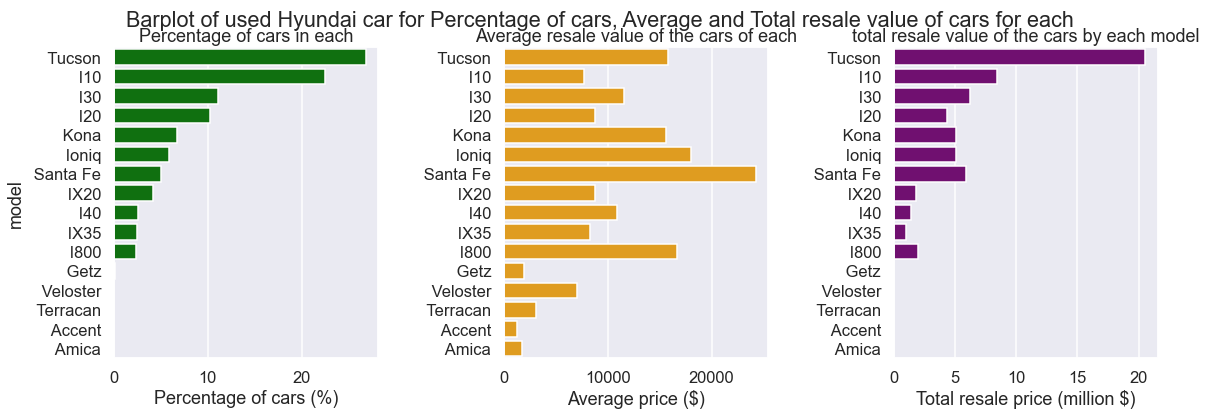

In [166]:
plt.figure(figsize = (17,16))

plt.subplot(3, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_m.index, data=df_agg_m, orient='h', color='green')
plt.title("\nPercentage of cars in each")
plt.xlabel("Percentage of cars (%)")

plt.subplot(3, 3, 2)
sns.barplot(x='mean', y=df_agg_m.index, data=df_agg_m, orient='h', color='orange')
plt.title("\nAverage resale value of the cars of each")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 3)
sns.barplot(x='sum', y=df_agg_m.index, data=df_agg_m, orient='h', color='purple')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total resale price (million $)")
plt.ylabel("")

plt.suptitle("Barplot of used Hyundai car for Percentage of cars, Average and Total resale value of cars for each")
plt.tight_layout()
plt.show()


#### Observation
1. **Top 5 selling car models** are - **Tucson** (26.75%), **I10** (22.47%), **I30** (11.03%), **I20** (10.21%), **Kona** (6.75%)
- **Average resale** value of the top 5 selling car models (in \$) - **Santa Fe** (24225), **Ioniq** (18056), **I800** (16659), **Tucson** (15818), **Kona** (15652)
- **Total resale value** of the top 5 selling car models (in million \$)- **Tucson** (20.56), **I10** (8.45), **I30** (6.22), **Santa Fe** (5.94), **Kona** (5.13)

### EDA of used Hyundai cars by transmission

#### Checking the number of unique values in the 'transmission' column

In [167]:
print(df['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto' 'Other']


#### Data Aggregation by 'transmission'

In [168]:
df_agg_t = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])
display(df_agg_t)

# Average Resale Value of Top Selling Cars
df_agg_t.sort_values(by='mean', ascending=False).head(5)

,count,mean,sum
transmission,,,
Automatic,669,16369.224215,10951011
Manual,3611,11059.049571,39934228
Other,2,14745.000000,29490
Semi-Auto,578,19119.217993,11050908


,count,mean,sum
transmission,,,
Semi-Auto,578,19119.217993,11050908
Automatic,669,16369.224215,10951011
Other,2,14745.000000,29490
Manual,3611,11059.049571,39934228


#### Data preprocessing before visualization

In [169]:
# sort the dataframe based on the column 'count'
df_agg_t = df_agg_t.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_t['percent_of_cars'] = (df_agg_t['count']/df_agg_t['count'].sum())*100

# convert the 'sum' column in millions
df_agg_t['sum'] = df_agg_t['sum']/1000000

# keep up to two decimal points
df_agg_t = df_agg_t.round(2)

# remove the 'count' column
df_agg_t = df_agg_t.drop('count', axis=1)

display(df_agg_t.head())

# Total Resale Value of Top Selling Cars in million $
df_agg_t.sort_values(by='sum', ascending=False).head(5)

,mean,sum,percent_of_cars
transmission,,,
Manual,11059.05,39.93,74.30
Automatic,16369.22,10.95,13.77
Semi-Auto,19119.22,11.05,11.89
Other,14745.00,0.03,0.04


,mean,sum,percent_of_cars
transmission,,,
Manual,11059.05,39.93,74.30
Semi-Auto,19119.22,11.05,11.89
Automatic,16369.22,10.95,13.77
Other,14745.00,0.03,0.04


#### Barplot: Percentage of cars, Average and Total selling price of cars by transmission

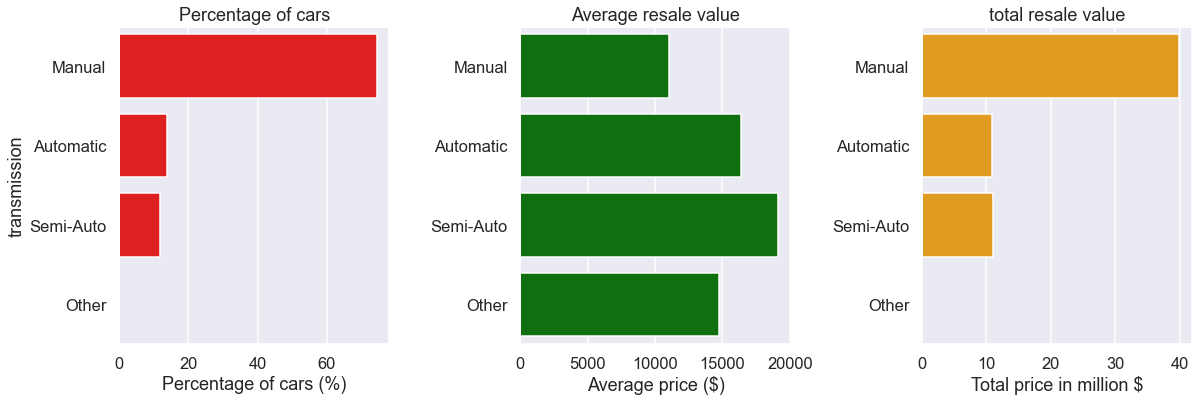

In [170]:
plt.figure(figsize = (17,16))

plt.subplot(3, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_t.index, data=df_agg_t, orient='h', color='red')
plt.title("Percentage of cars")
plt.xlabel("Percentage of cars (%)")

plt.subplot(3, 3, 2)
sns.barplot(x='mean', y=df_agg_t.index, data=df_agg_t, orient='h', color='green')
plt.title("Average resale value")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 3)
sns.barplot(x='sum', y=df_agg_t.index, data=df_agg_t, orient='h', color='orange')
plt.title("total resale value")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.tight_layout()
plt.show()

#### Observation
1. **Top selling Cars** according to transmission are - **Manual** (74.30%), **Automatic** (13.77%), **Semi-Auto** (11.89%)
- **Average resale** value (in \$) - **Semi-Auto** (19119), **Automatic** (16369), **Other** (14745), **Manual** (11059)
- **Total resale value** (in million \$)- **Manual** (39.93), **Semi-Auto** (11.05), **Automatic** (10.95)

### EDA of used Hyundai cars by fuelType

#### Checking the number of unique values in the 'fuelType' column

In [171]:
print(df['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Other']


### Data Aggregation by 'fuelType'

In [172]:
df_agg_ft = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])
display(df_agg_ft)

# Average Resale Value of Top Selling Cars
df_agg_ft.sort_values(by='mean', ascending=False).head(5)

,count,mean,sum
fuelType,,,
Diesel,1608,14589.905473,23460568
Hybrid,349,19223.272206,6708922
Other,1,12800.000000,12800
Petrol,2902,10952.221571,31783347


,count,mean,sum
fuelType,,,
Hybrid,349,19223.272206,6708922
Diesel,1608,14589.905473,23460568
Other,1,12800.000000,12800
Petrol,2902,10952.221571,31783347


### Data preprocessing before visualization

In [173]:
# sort the dataframe based on the column 'count'
df_agg_ft = df_agg_ft.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_ft['percent_of_cars'] = (df_agg_ft['count']/df_agg_ft['count'].sum())*100

# convert the 'sum' column in millions
df_agg_ft['sum'] = df_agg_ft['sum']/1000000

# keep up to two decimal points
df_agg_ft = df_agg_ft.round(2)

# remove the 'count' column
df_agg_ft = df_agg_ft.drop('count', axis=1)

display(df_agg_ft.head())

# Total Resale Value of Top Selling Cars in million $
df_agg_ft.sort_values(by='sum', ascending=False).head(5)

,mean,sum,percent_of_cars
fuelType,,,
Petrol,10952.22,31.78,59.71
Diesel,14589.91,23.46,33.09
Hybrid,19223.27,6.71,7.18
Other,12800.00,0.01,0.02


,mean,sum,percent_of_cars
fuelType,,,
Petrol,10952.22,31.78,59.71
Diesel,14589.91,23.46,33.09
Hybrid,19223.27,6.71,7.18
Other,12800.00,0.01,0.02


### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

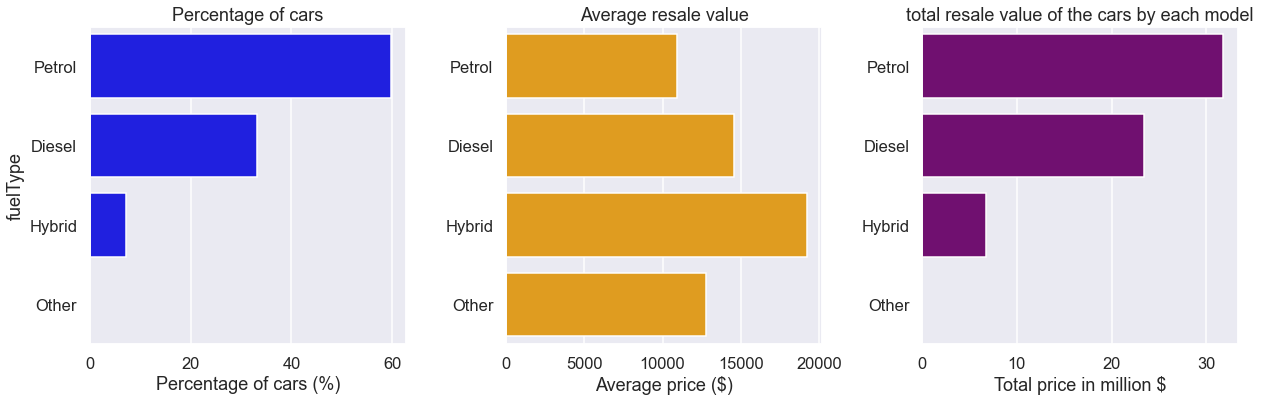

In [174]:
plt.figure(figsize=(18,16))

plt.subplot(3, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_ft.index, data=df_agg_ft, orient='h', color='blue')
plt.title("Percentage of cars")
plt.xlabel("Percentage of cars (%)")

plt.subplot(3, 3, 2)
sns.barplot(x='mean', y=df_agg_ft.index, data=df_agg_ft, orient='h', color='orange')
plt.title("Average resale value")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(3, 3, 3)
sns.barplot(x='sum', y=df_agg_ft.index, data=df_agg_ft, orient='h', color='purple')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.tight_layout()
plt.show()

#### Observation
1. **Top selling Cars** according to fuelType are - **Petrol** (59.71%), **Diesel** (33.09%), **Hybrid** (7.18%)
- **Average resale** value (in \$) - **Hybrid** (19223), **Diesel** (14589), **Petrol** (10952)
- **Total resale value** (in million \$)- **Petrol** (31.78), **Diesel** (23.46), **Hybrid** (6.71)

#### Pivot table for calculating count, average (mean) and total selling prices of cars with respect to model column

In [175]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
Accent,1,1295.000000,1295
Amica,1,1750.000000,1750
Getz,6,1927.500000,11565
I10,1092,7741.870879,8454123
I20,496,8810.721774,4370118
I30,536,11609.555970,6222722
I40,127,10927.188976,1387753
I800,117,16659.076923,1949112


- According to the pivot table above, there are 1092 cars with the I10 model. The average selling price of the I10 model cars is 7741.870879 USD, with a total selling price of 8454123 USD. And similarly the other models

#### Pivot table for calculating count, average (mean) and total selling prices of cars with respect to transmission column

In [183]:
df_pivot = pd.pivot_table(df, index='transmission', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
transmission,,,
Automatic,669,16369.224215,10951011
Manual,3611,11059.049571,39934228
Other,2,14745.000000,29490
Semi-Auto,578,19119.217993,11050908


According to the pivot table above:
- There are a total of 669 cars with automatic transmissions. Automatic cars had an average selling price of 16369.224215 USD and a total selling price of 10951011 USD.
- A total of 3611 cars with manual transmissions are present in the dataset. Manual cars had an average selling price of 11059.049571 USD and a total selling price of 39934228 USD, respectively.
- Lastly, there are a total of 578 cars with semi-auto transmissions. Semi-auto cars had an average selling price of 19119.217993 USD and a total selling price of 11050908 USD, respectively.

#### Pivot table for calculating count, average (mean) and total selling prices of cars with respect to fuelType column

In [185]:
df_pivot = pd.pivot_table(df, index='fuelType', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,1608,14589.905473,23460568
Hybrid,349,19223.272206,6708922
Other,1,12800.000000,12800
Petrol,2902,10952.221571,31783347


According to the pivot table above:
- The total number of cars with a diesel fuelType is 1608. The average selling price and total selling price for diesel fuelType are 14589.905473 and 23460568 USD respectively.
- The total number of cars with a Hybrid is 349. The average selling price and total selling price for diesel fuelType are 19223.272206 and 6708922 USD respectively.
- Finally, the total number of cars with a petrol fuelType is 1608. The average selling price and total selling price for diesel fuelType are 10952.221571 and 31783347 USD respectively.